# Imports

In [484]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ssl
import random

## Import dataset

In [485]:
ssl._create_default_https_context = ssl._create_unverified_context

data_set = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images,test_labels) = data_set.load_data()#creating train and test subsets


## Check shapes 

In [486]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Let's store the class names

In [487]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse','ship','truck']

## Let's plot some picture

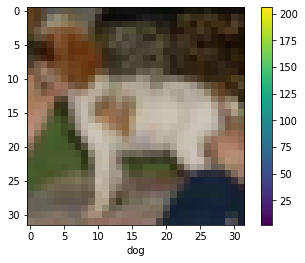

In [488]:
e = 12
plt.figure()
plt.imshow(test_images[e])
plt.xlabel(classes[test_labels[e][0]])
plt.colorbar()
plt.show()

## Let's make a function 'rgb2gray' to convert all images into grey color 

In [489]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    
res1 = rgb2gray(train_images)
res2 = rgb2gray(test_images)
train_images = res1
test_images = res2


# Scale 0 to 255 into 0 to 1 
train_images = train_images /255.0
test_images = test_images /255.0

## Ploting grey color photos with label
            https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

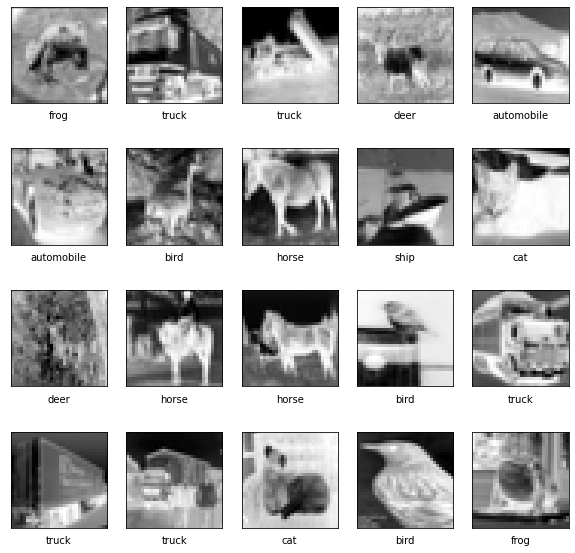

In [490]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

## Build the Model

In [491]:

# Set up layers of model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),#reshape into vector
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2000, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [492]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [493]:
model.fit(train_images,train_labels,epochs=20,batch_size = 550)

Epoch 1/20
91/91 [==============================] - 12s 123ms/step - loss: 2.0229 - accuracy: 0.2625
Epoch 2/20
91/91 [==============================] - 11s 120ms/step - loss: 1.8438 - accuracy: 0.3383
Epoch 3/20
91/91 [==============================] - 11s 122ms/step - loss: 1.7715 - accuracy: 0.3662
Epoch 4/20
91/91 [==============================] - 11s 117ms/step - loss: 1.7054 - accuracy: 0.3896
Epoch 5/20
91/91 [==============================] - 11s 120ms/step - loss: 1.6600 - accuracy: 0.4089
Epoch 6/20
91/91 [==============================] - 11s 122ms/step - loss: 1.6053 - accuracy: 0.4257
Epoch 7/20
91/91 [==============================] - 12s 127ms/step - loss: 1.5738 - accuracy: 0.4401
Epoch 8/20
91/91 [==============================] - 12s 126ms/step - loss: 1.5336 - accuracy: 0.4556
Epoch 9/20
91/91 [==============================] - 12s 126ms/step - loss: 1.4815 - accuracy: 0.4751
Epoch 10/20
91/91 [==============================] - 11s 125ms/step - loss: 1.4462 - accura

In [494]:
model.evaluate(train_images,train_labels)

1563/1563 [==============================] - 12s 7ms/step - loss: 0.6332 - accuracy: 0.7793


[0.633163571357727, 0.779259979724884]

### Making a  model prediction with test subsets

In [495]:
pred = model.predict(test_images) 

313/313 [==============================] - 2s 7ms/step


In [496]:
classes = np.array(classes)
def check_NN_work(x, y, index):
    x = np.array(x)
    y = np.array(y)
    plt.figure(figsize = (10,3))
    plt.imshow(x[index],plt.cm.binary )
    plt.colorbar()
    plt.xlabel(classes[y[index]])

## NN makes a prediction

        List task is a list that contains numbers of photos. Uncomment some list to check out how the program works.

Task list is: [6, 76, 1105, 1106, 34, 23, 45, 12, 76, 89] .Lenght of list is: 10


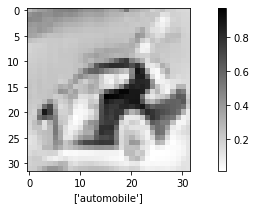

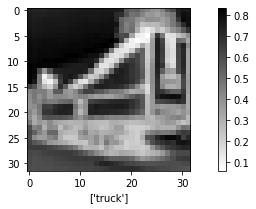

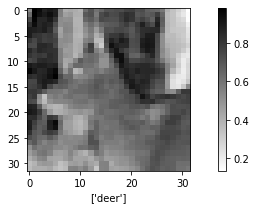

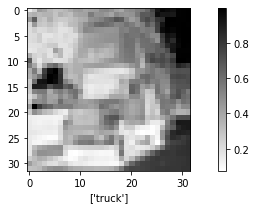

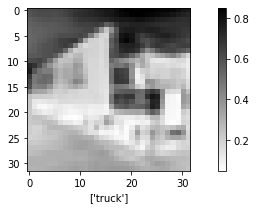

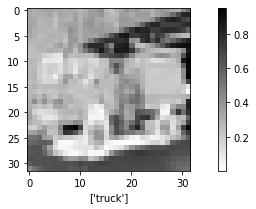

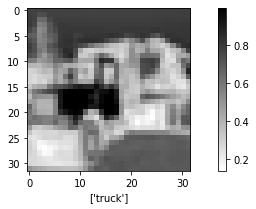

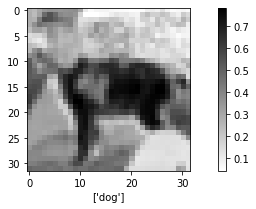

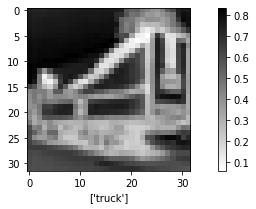

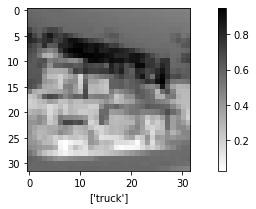

In [497]:
task = [6, 76, 1105, 1106, 34,23,45,12,76,89]
# task = [34,25,26,28,98,1099,1101,245,77,69]
# task = [55,66,77,14,34,56,98,77,456,765]
# task = [4,78,987,1234,4322,2,15,1555,876,687]
# task = [5,76,13,14,55,67,87,98,45,56]
l = len(task)
for i in range(l):
    check_NN_work(test_images,test_labels,task[i])
print('Task list is:',task,'.Lenght of list is:', l)

## We check a prediction

In [498]:
prediction_list=[]#list with predictions
real_output = []#list with answers
# Coverting list with answers into list
# ----
for j in task:
    prediction_list.append(classes[np.argmax(pred[j])])
    real_output.append(classes[test_labels[j]].tolist())
real_output
new_list = []
for list in real_output:
    new_list+=list
real_list = new_list
# ----
# End of converting

rights_answers = 0 #counting the right answers after model prediction 
for i in range(l):
    if prediction_list[i] == real_list[i]:
        rights_answers+=1
print('There are', rights_answers, 'right answers out of', len(task), 'in model output.')
# print(real_list)
# print(prediction_list)

There are 7 right answers out of 10 in model output.
